In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_excel("2005.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2005,17348,362,19,3509
1,2005,17418,289,36,3514
2,2005,17636,57,22,3524
3,2005,17233,305,39,3499
4,2005,17156,307,16,3549
...,...,...,...,...,...
1876,2005,17546,393,28,3534
1877,2005,17495,167,14,3556
1878,2005,17189,78,41,3512
1879,2005,17056,28,40,3502


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1881, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1881 non-null   int64
 1   Maximum length (m))  1881 non-null   int64
 2   Recession(m),        1881 non-null   int64
 3   Rate/yr(m)           1881 non-null   int64
 4   Snout altitude (m)   1881 non-null   int64
dtypes: int64(5)
memory usage: 73.6 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1881


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2005,17348,362,19,3509
1,2005,17418,289,36,3514
2,2005,17636,57,22,3524
3,2005,17233,305,39,3499
4,2005,17156,307,16,3549


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0038,0.0006,0.0431
"Recession(m),",NaN,0.0038,1.0000,0.0110,-0.0050
Rate/yr(m),NaN,0.0006,0.0110,1.0000,0.0085
Snout altitude (m),NaN,0.0431,-0.0050,0.0085,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))   1.0000
Snout altitude (m)    0.0431
Recession(m),         0.0038
Rate/yr(m)            0.0006
Year                     NaN
Name: Maximum length (m)), dtype: float64

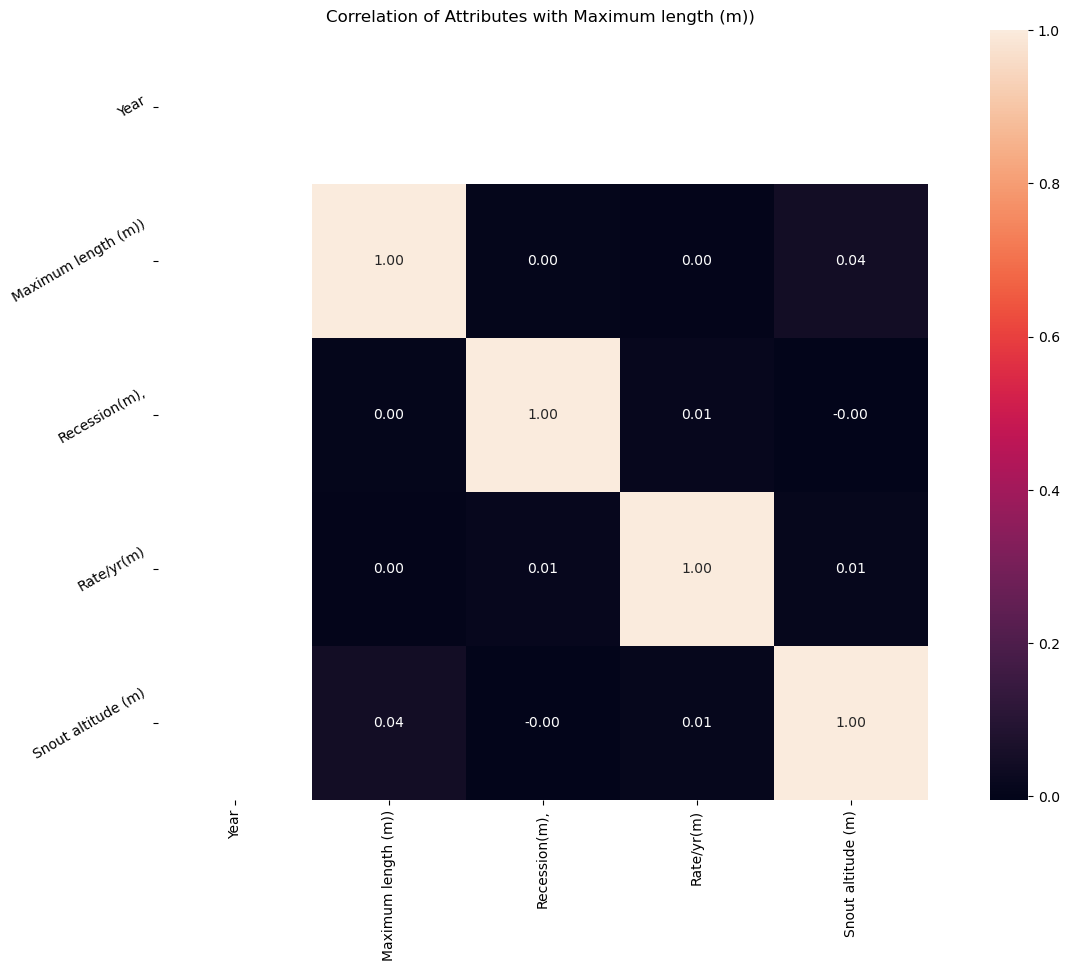

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,881.0000","1,881.0000","1,881.0000","1,881.0000","1,881.0000"
mean,"2,005.0000","17,550.5423",220.9771,27.9623,"3,532.4386"
std,0.0000,299.0786,126.7960,8.6809,20.3274
min,"2,005.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,005.0000","17,294.0000",111.0000,20.0000,"3,515.0000"
50%,"2,005.0000","17,551.0000",222.0000,28.0000,"3,532.0000"
75%,"2,005.0000","17,815.0000",327.0000,36.0000,"3,550.0000"
max,"2,005.0000","18,065.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2005   1.0000
Name: Year, dtype: float64

275   0.0053
359   0.0053
3     0.0053
289   0.0048
195   0.0048
       ...  
58    0.0005
313   0.0005
75    0.0005
326   0.0005
339   0.0005
Name: Recession(m),, Length: 436, dtype: float64

39   0.0393
40   0.0388
36   0.0383
37   0.0372
29   0.0372
35   0.0367
34   0.0356
23   0.0356
33   0.0351
18   0.0346
32   0.0340
28   0.0340
19   0.0340
24   0.0340
42   0.0340
41   0.0340
22   0.0340
38   0.0330
16   0.0324
14   0.0319
25   0.0314
20   0.0314
13   0.0303
17   0.0303
27   0.0303
30   0.0298
21   0.0287
31   0.0287
15   0.0282
26   0.0271
Name: Rate/yr(m), dtype: float64

3541   0.0207
3527   0.0191
3554   0.0186
3565   0.0181
3521   0.0175
        ...  
3557   0.0106
3540   0.0106
3499   0.0106
3514   0.0101
3496   0.0005
Name: Snout altitude (m), Length: 72, dtype: float64



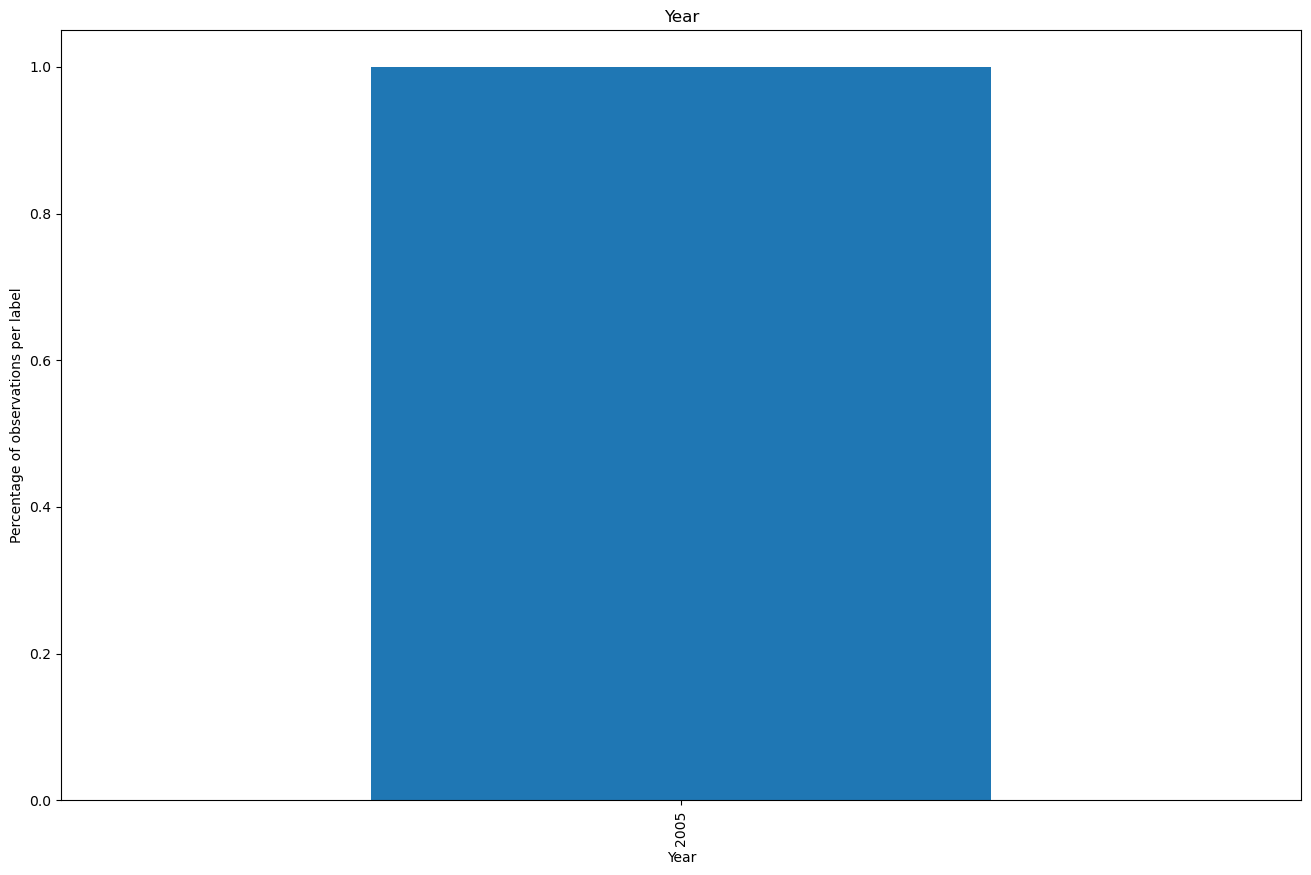

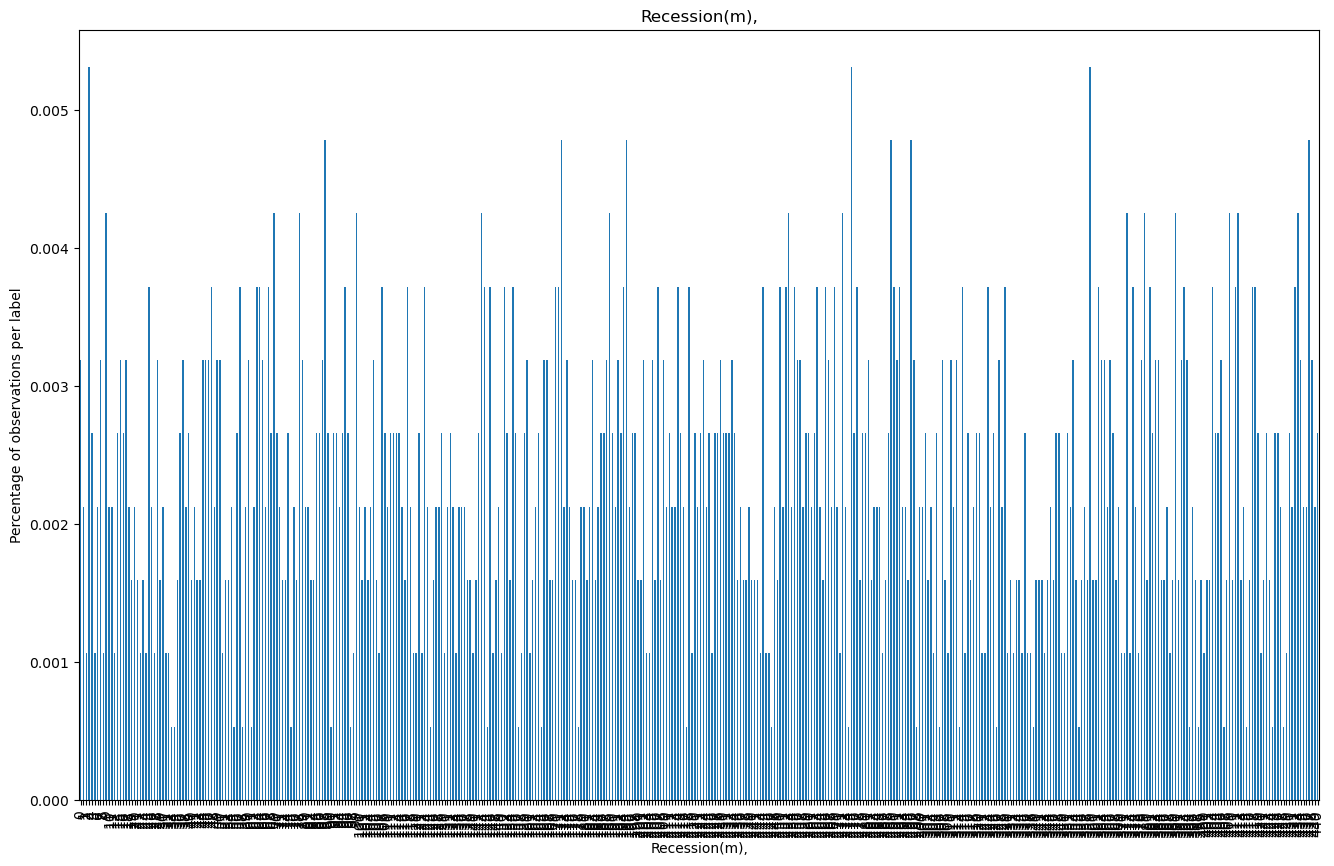

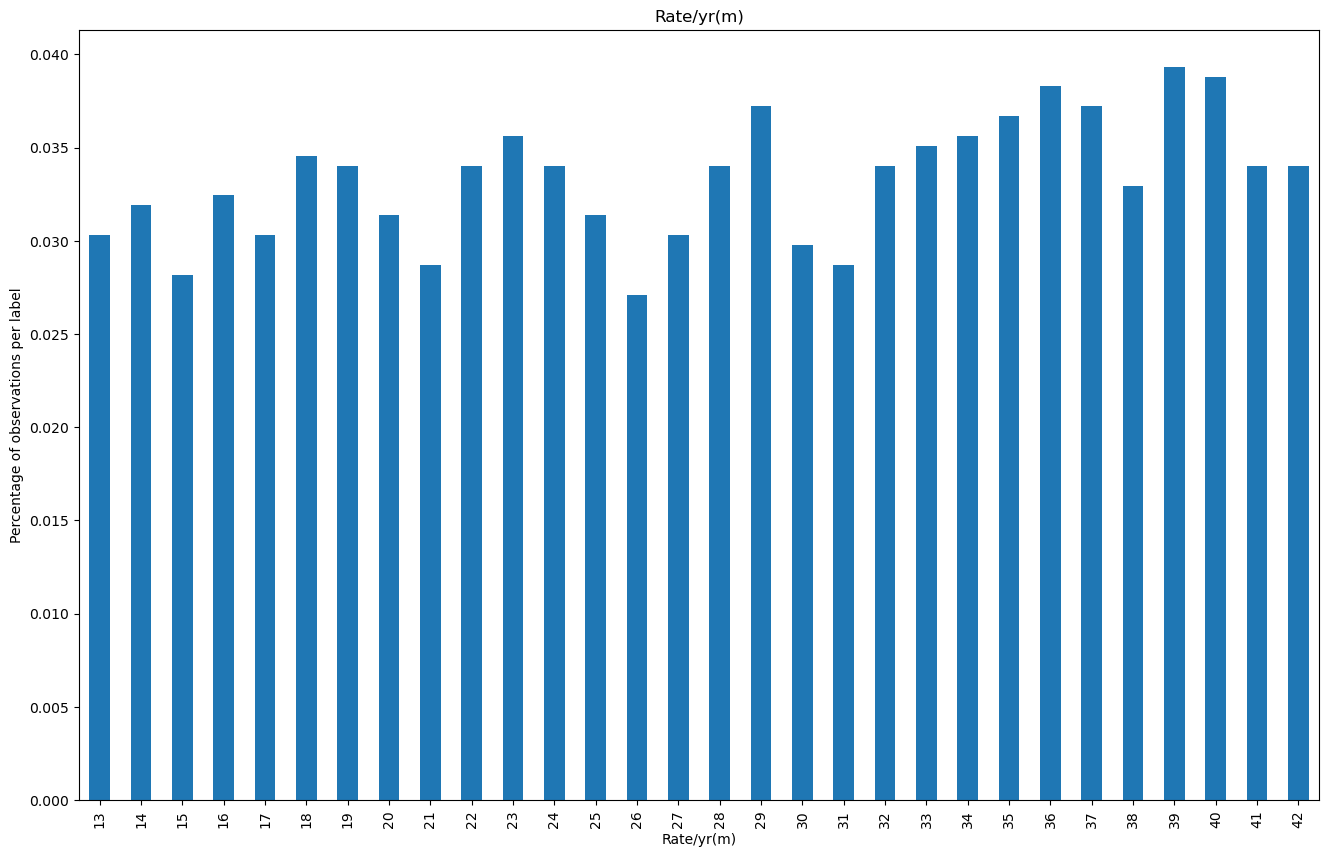

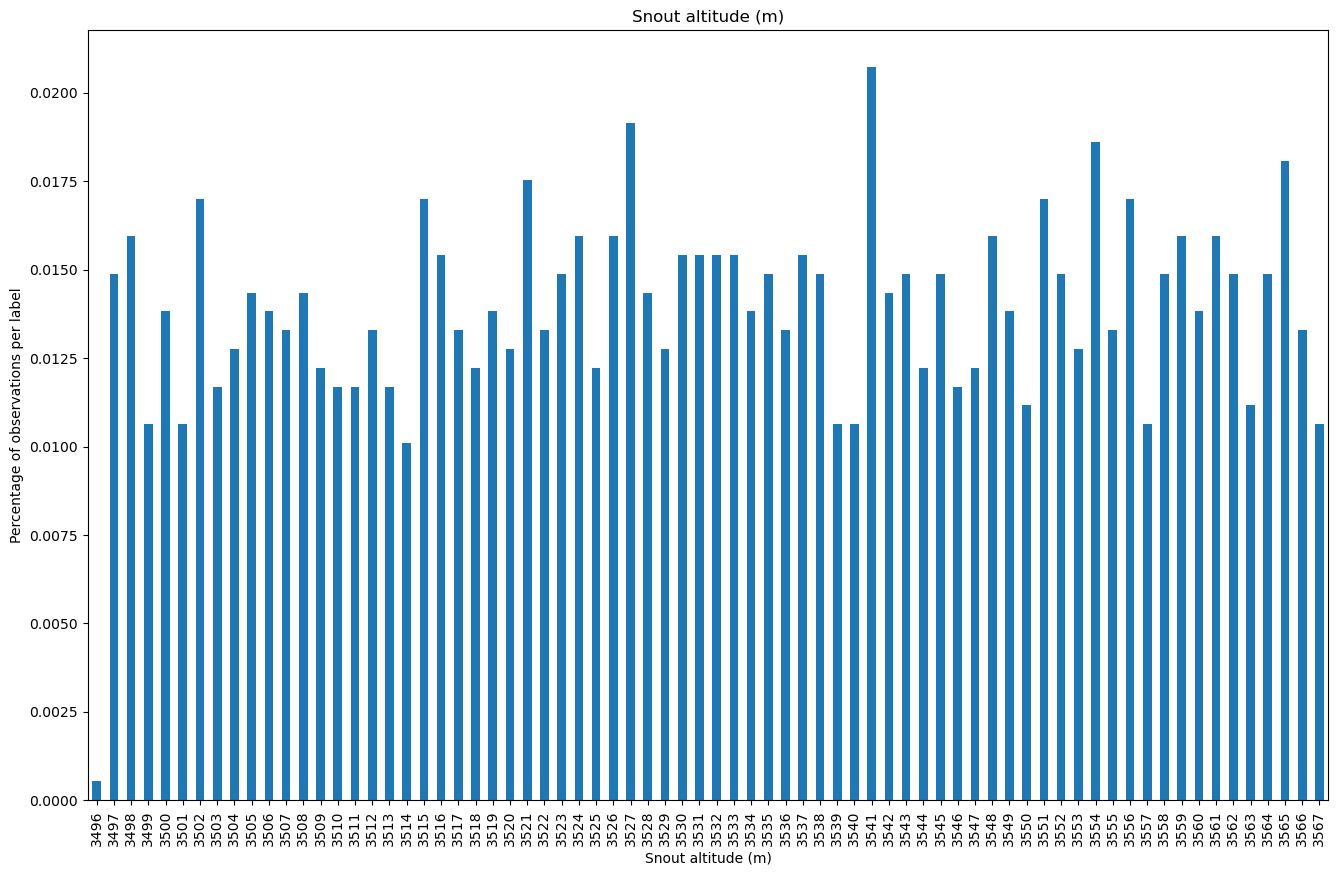

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()